This is the code for the Example 12. in the main text.
The following image is the SCM that we implement.

- Unobserved nodes: $X_2$
- Cause node: $X_4$
- Outcome node: $X_6$
- Node that satisfies the backdoor criterion for a pair $(X_4, X_6)$: $X_3$

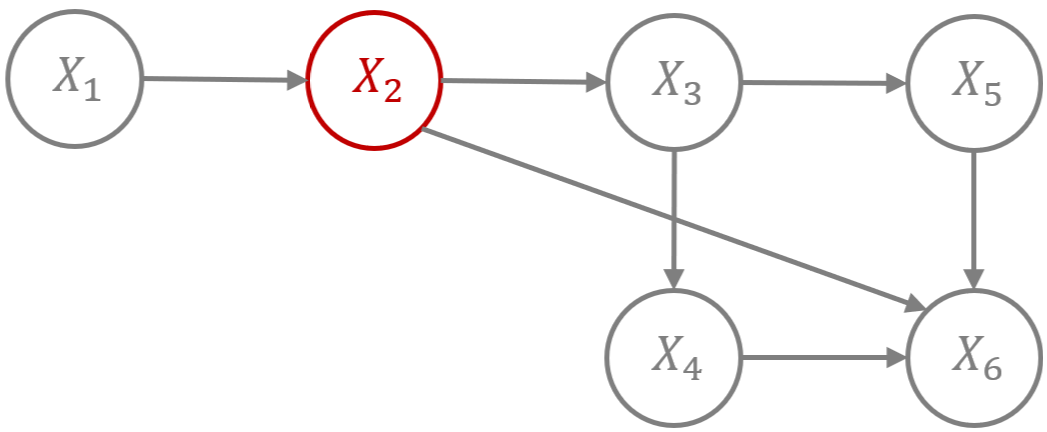

Define
- the structural equation: $X_i = f(PA(X_i)) + U_i$
  - $X_1 = U_1$
  - $X_2 = \frac{\sqrt{|X_1|} (|U_2| + 0.1)}{2} + |X_1| + \frac{U_2}{5}$
  - $X_3 = \frac{1}{1 + (|U_3| + 0.1) \exp(-X_2)}$
  - $X_4 = \frac{U_4 (|X_3| + 0.3)}{5} + U_4$
  - $X_5 = \frac{1}{\sqrt{|U_5 X_3|} + 0.1} + U_5$
  - $X_6 = X_2^2 X_4 + X_2 X_5 + X_5 X_6 + X_2 U_6$


In [1]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM2 import SCM2

  0%|          | 0/5 [00:00<?, ?it/s]

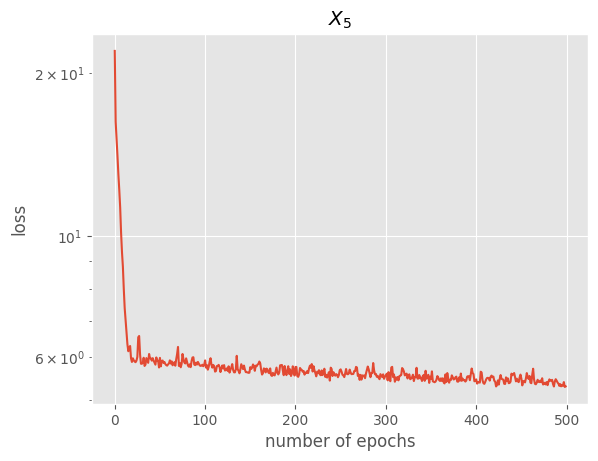

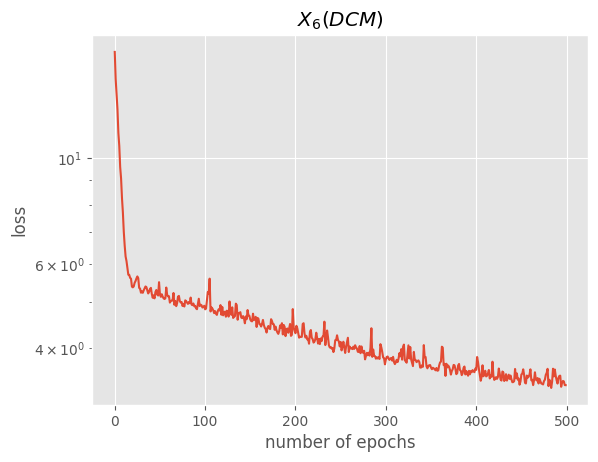

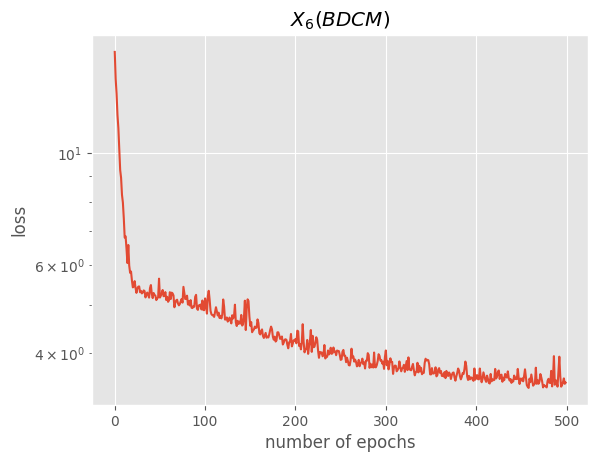

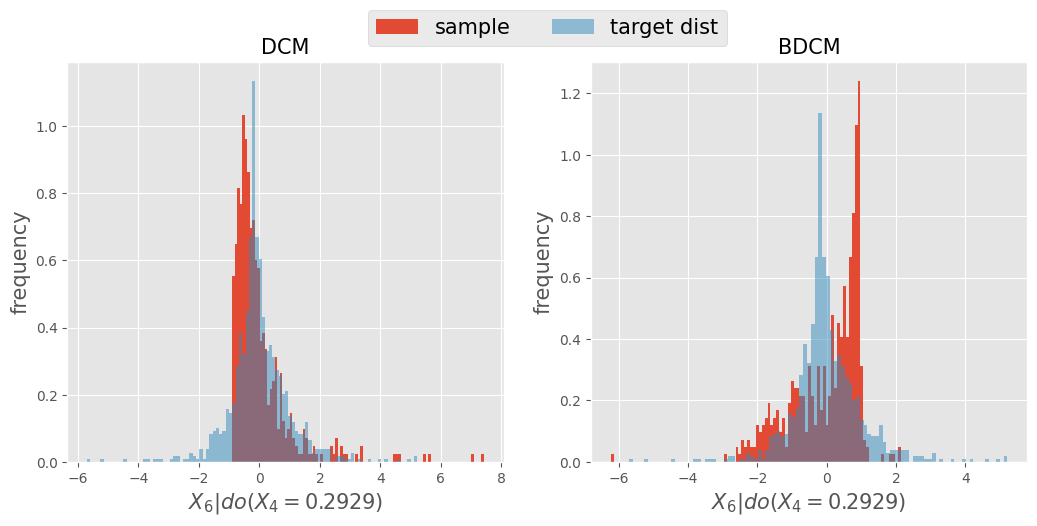

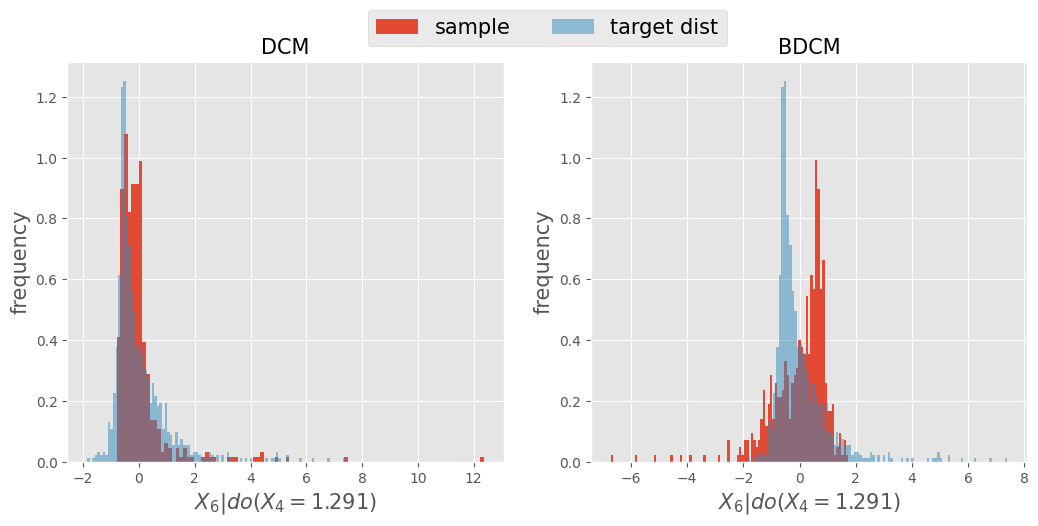

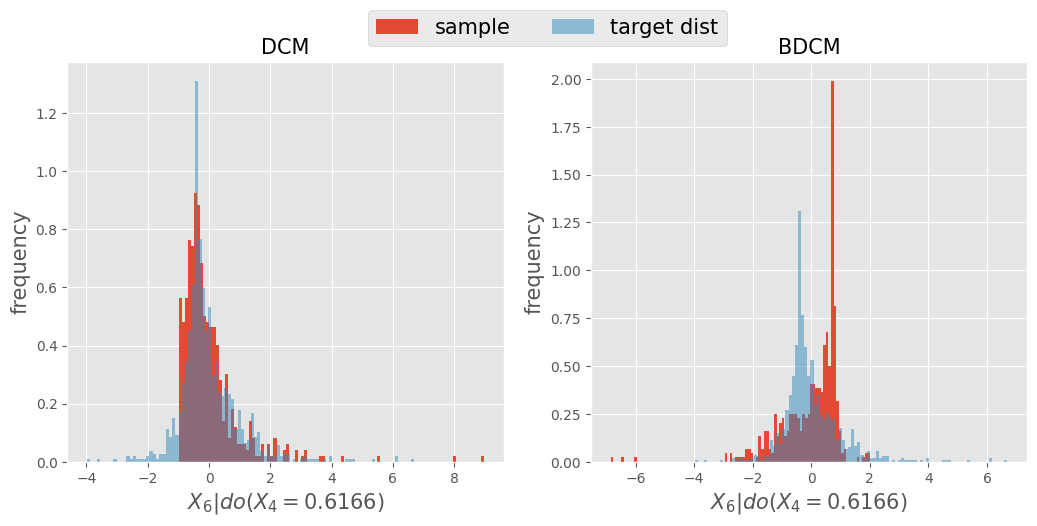

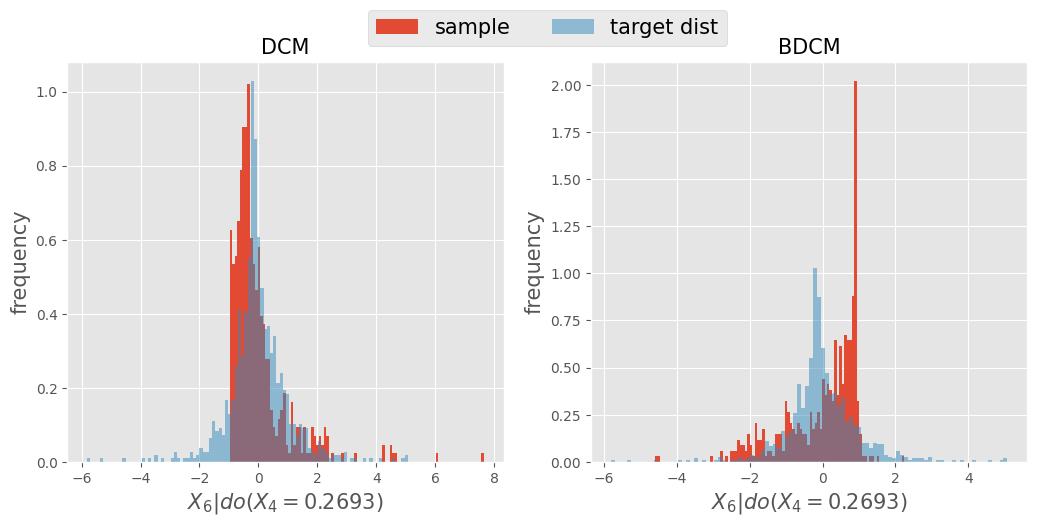

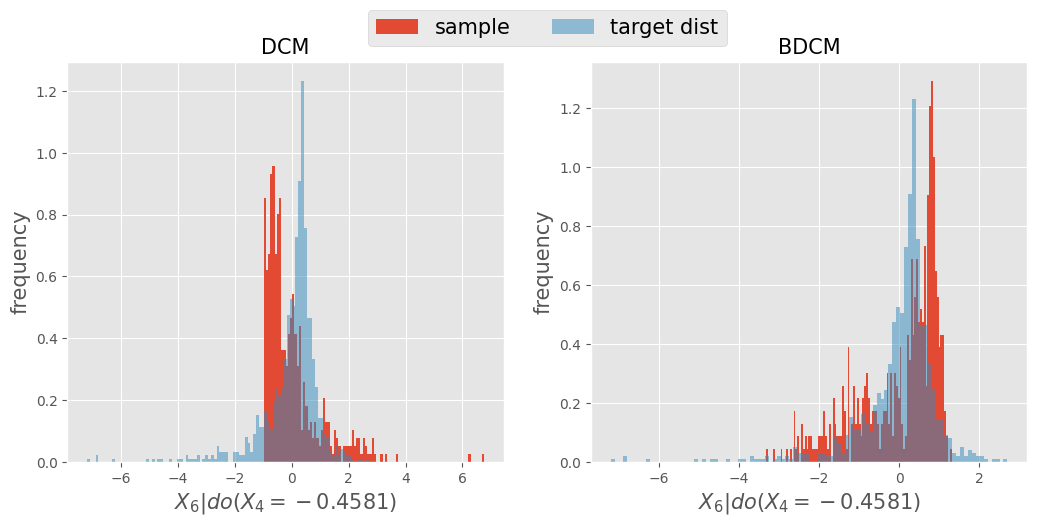

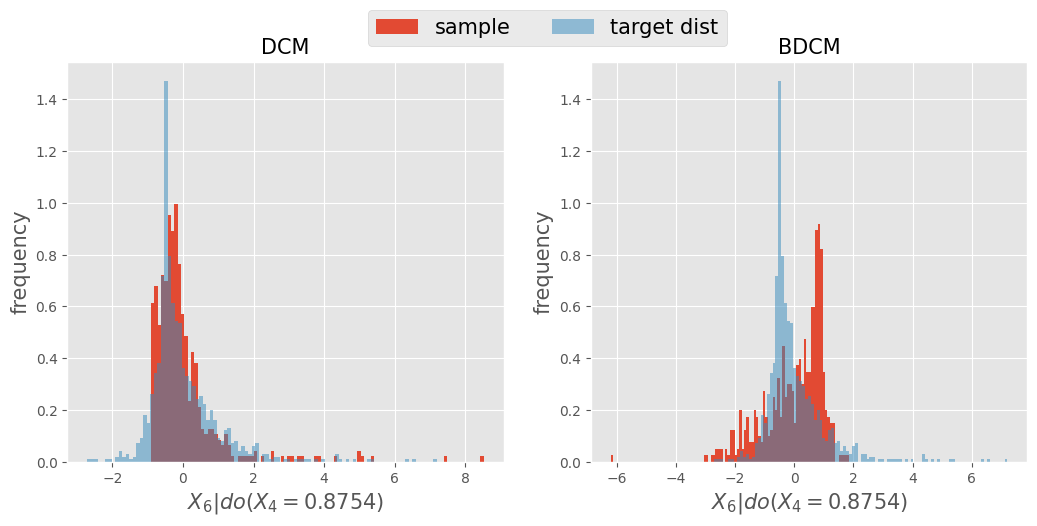

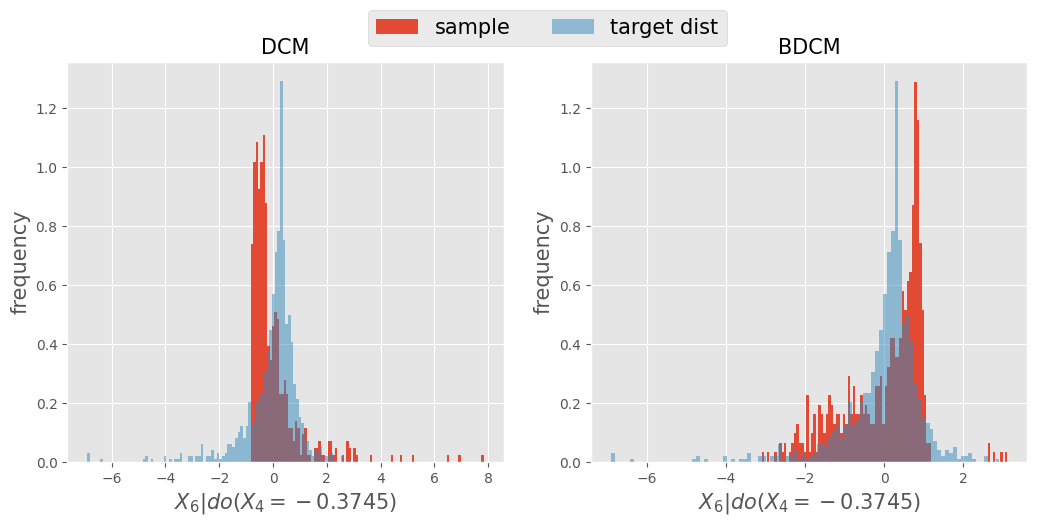

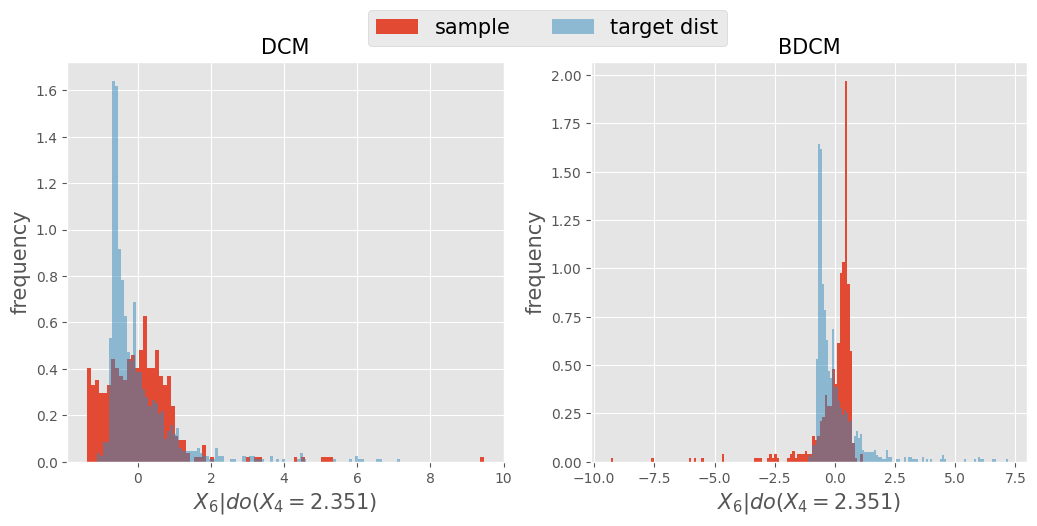

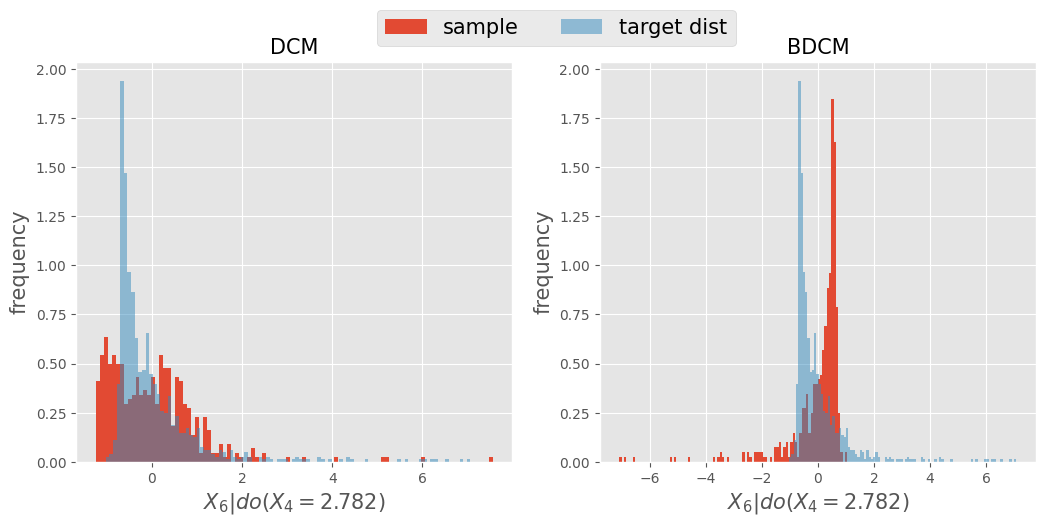

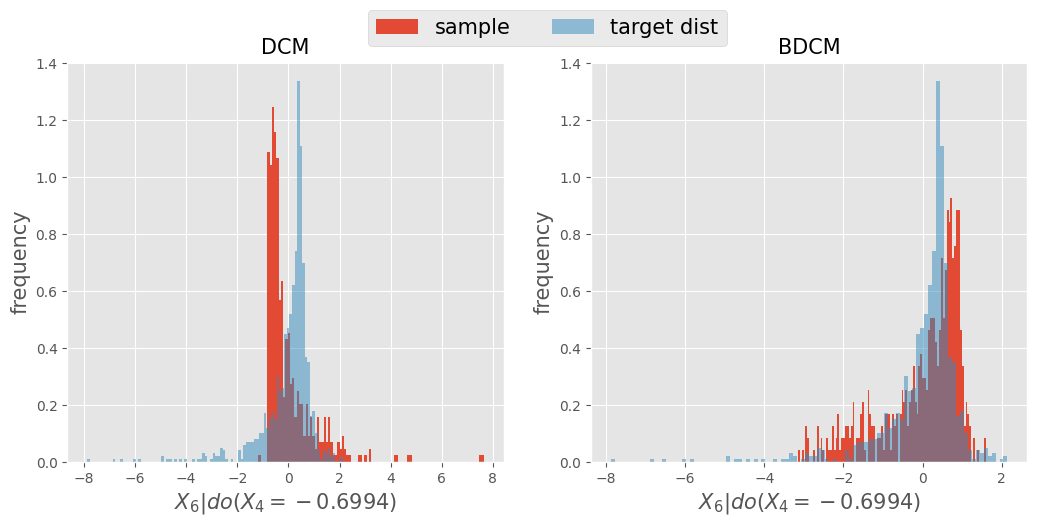

 20%|██        | 1/5 [09:47<39:11, 587.89s/it]

mean of MMD for DCM: 0.00228
standard deviation of MMD for DCM: 0.00216
mean of MMD for BDCM: 0.00321
standard deviation of MMD for BDCM: 0.00312


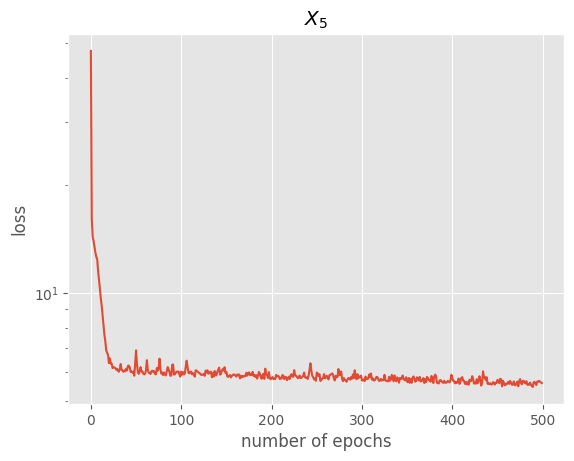

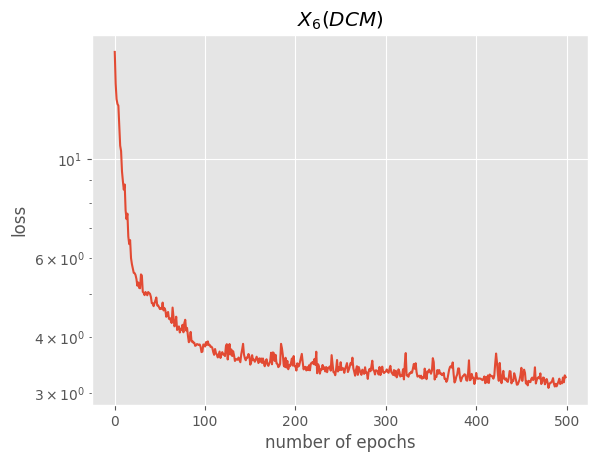

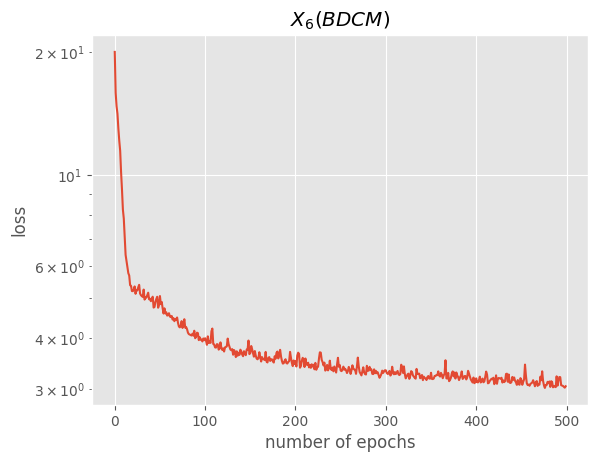

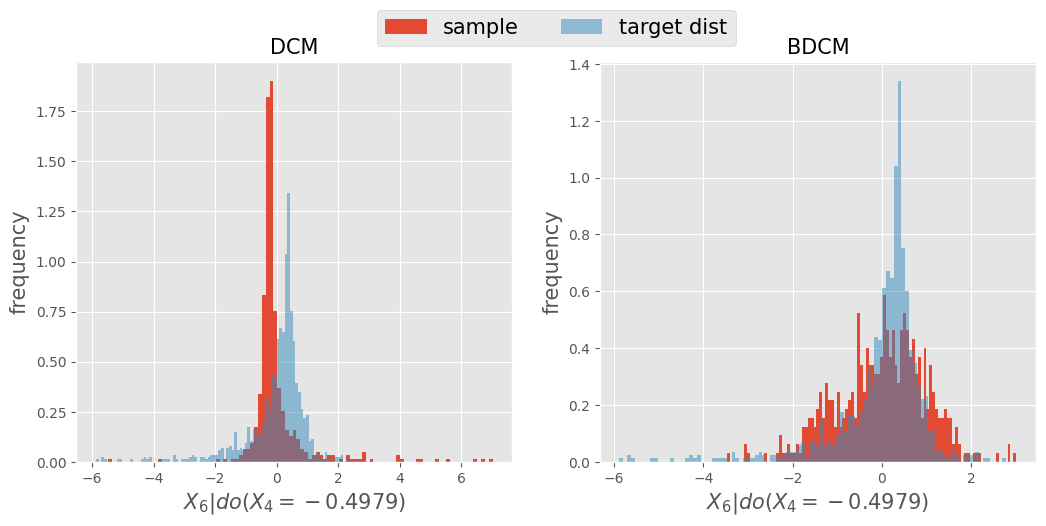

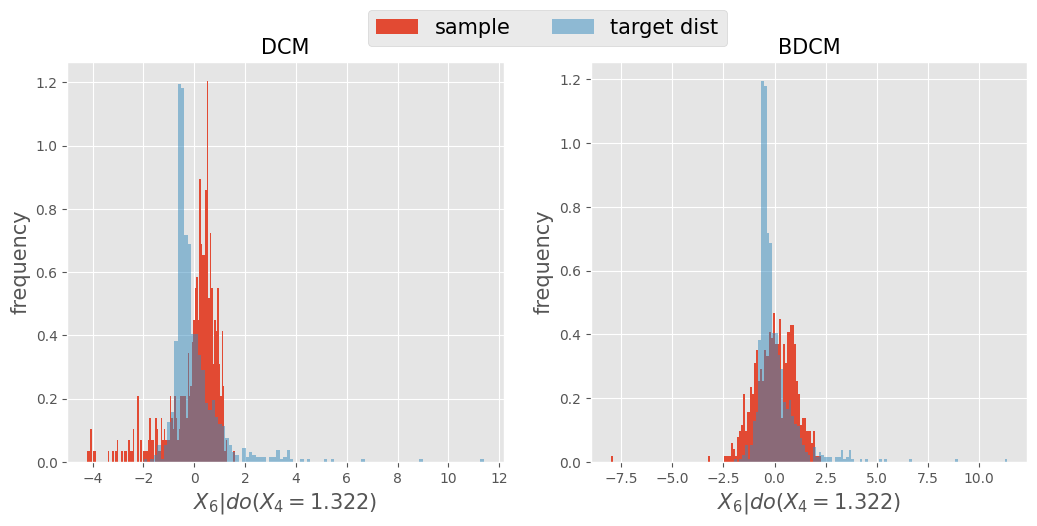

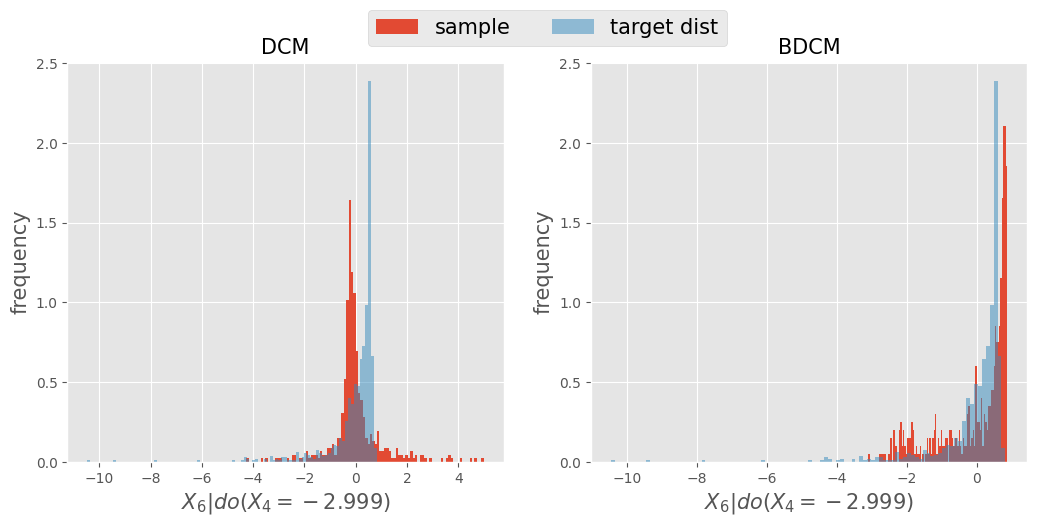

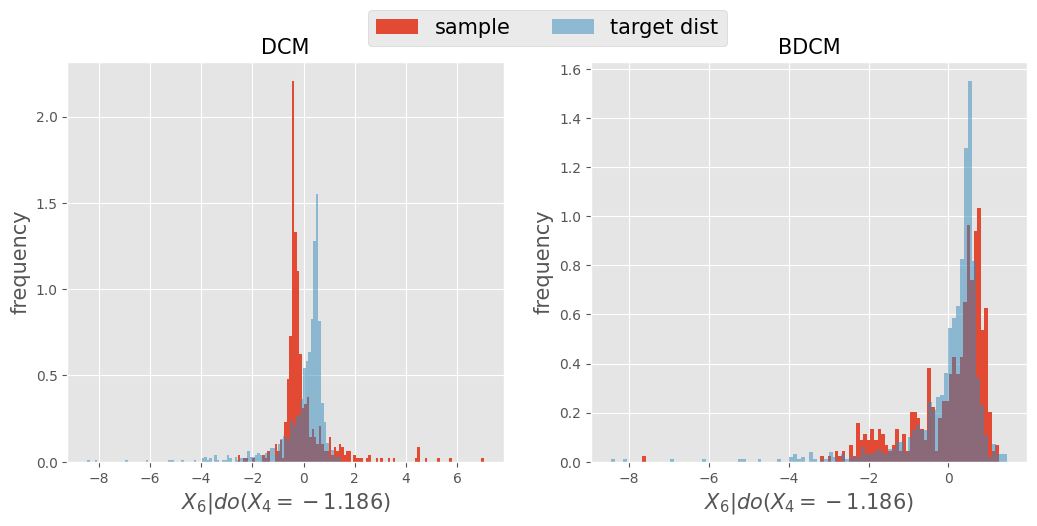

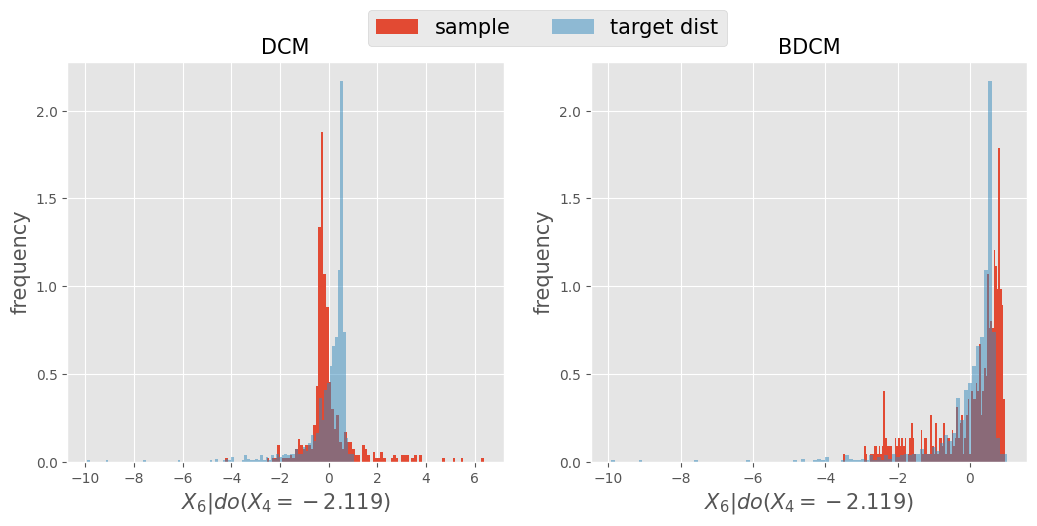

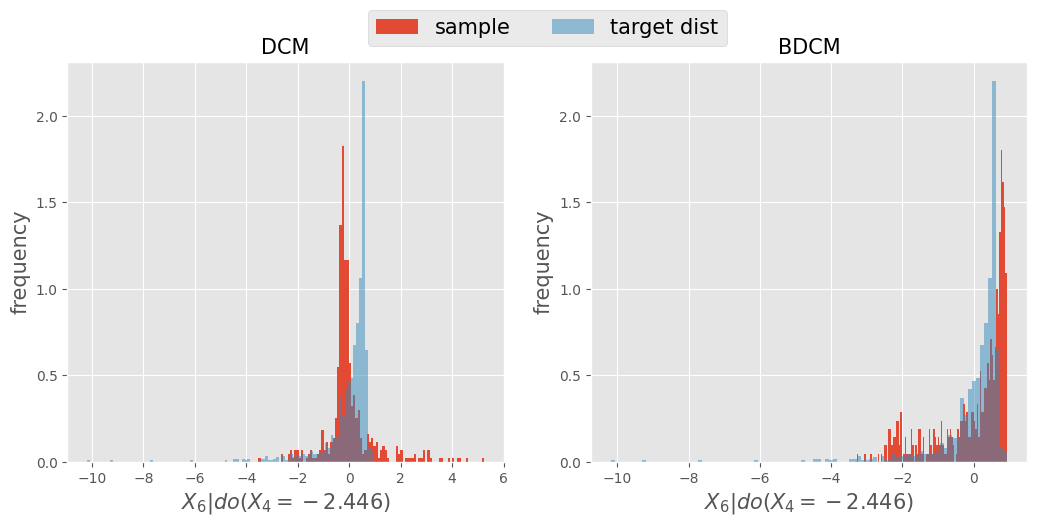

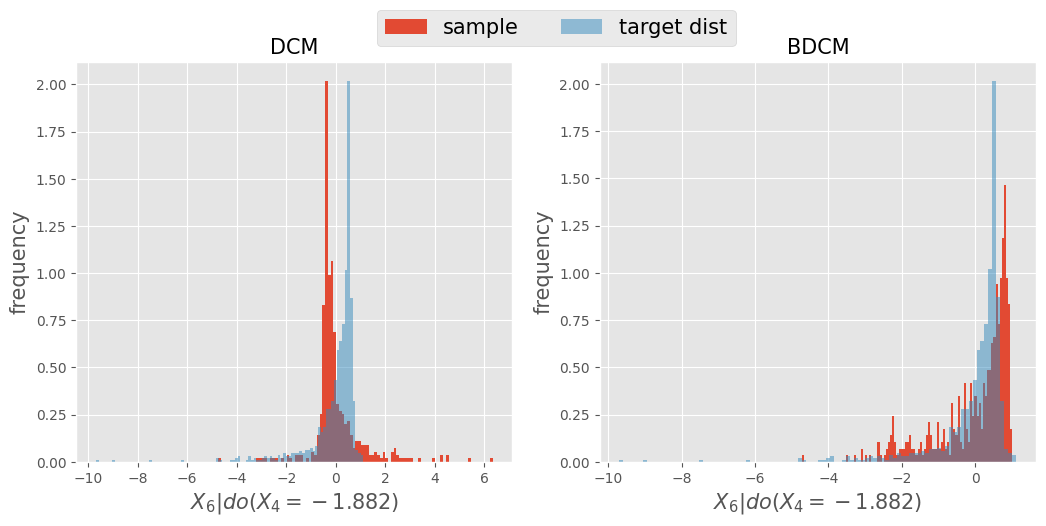

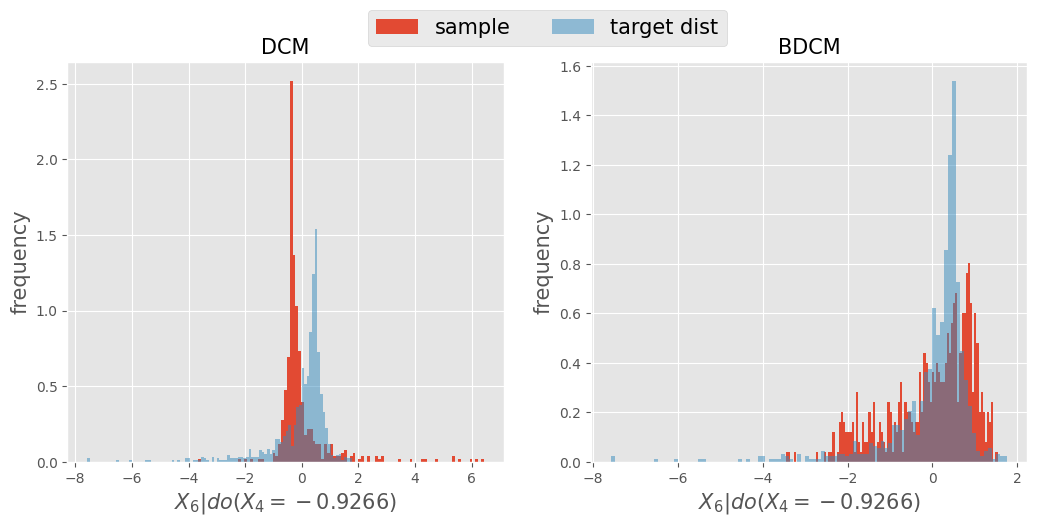

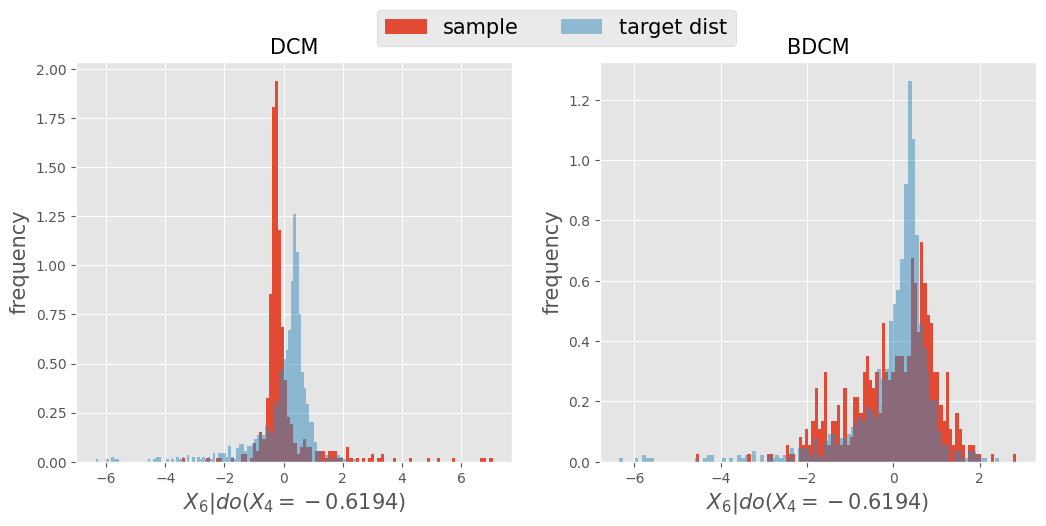

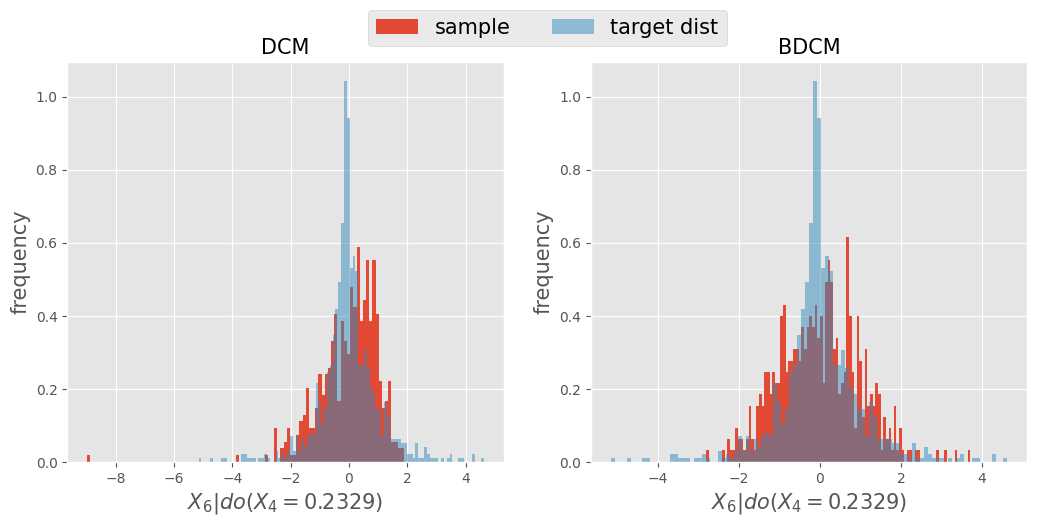

 40%|████      | 2/5 [19:27<29:09, 583.30s/it]

mean of MMD for DCM: 0.00414
standard deviation of MMD for DCM: 0.00124
mean of MMD for BDCM: 0.000968
standard deviation of MMD for BDCM: 0.000938


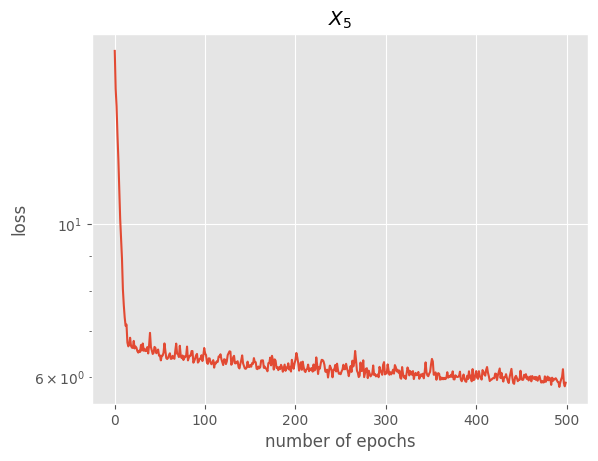

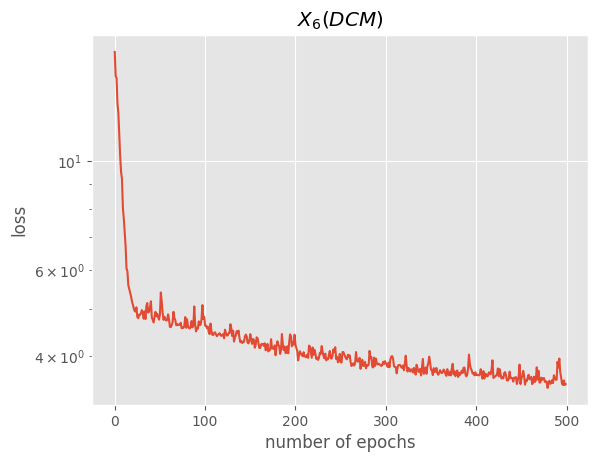

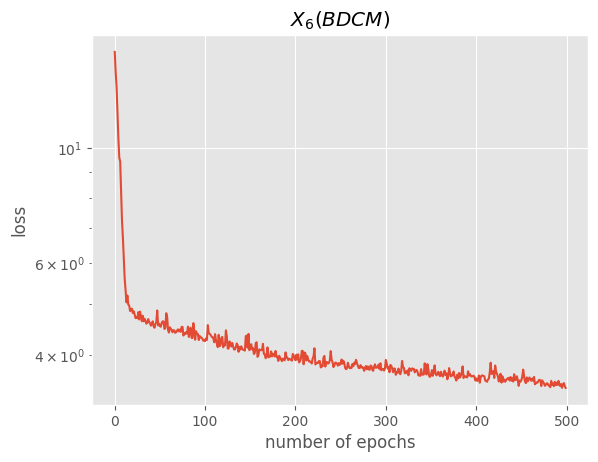

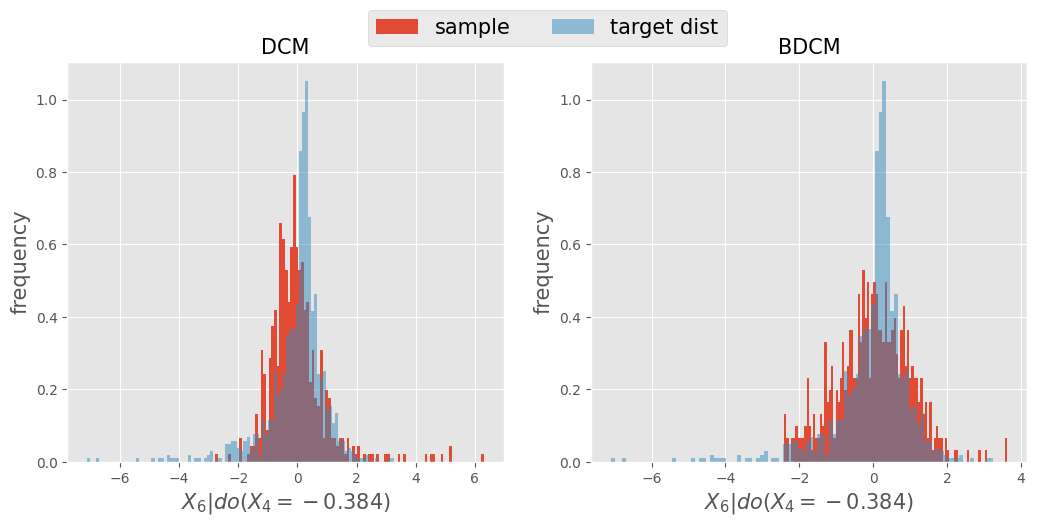

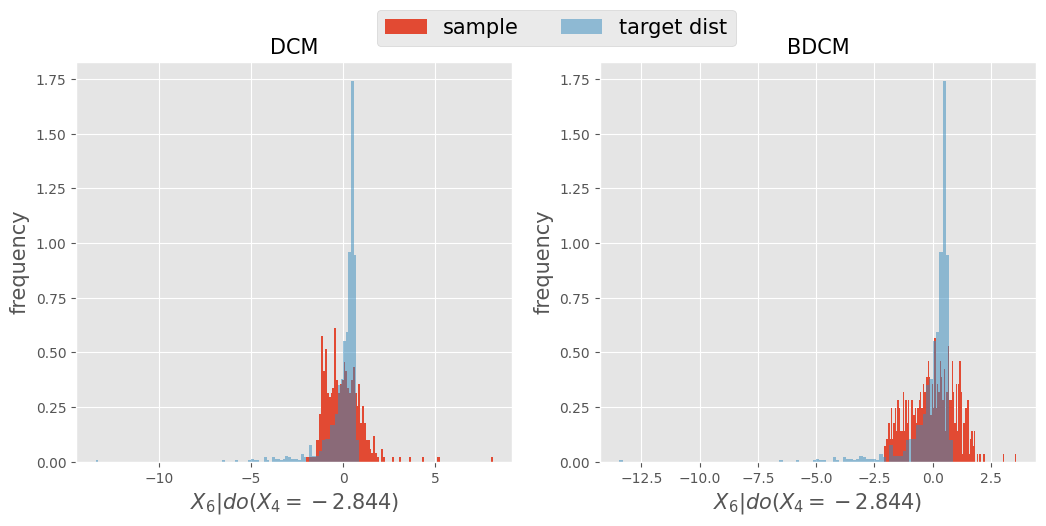

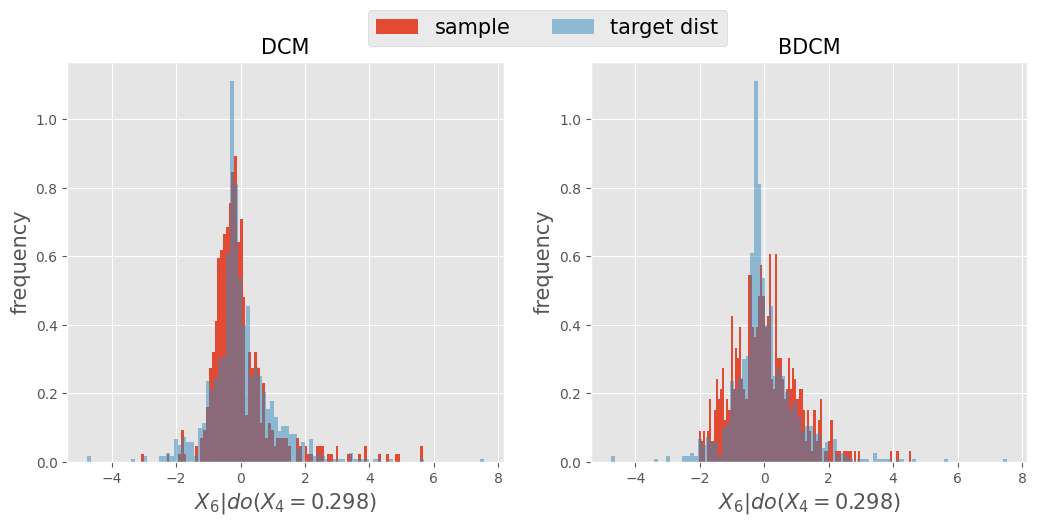

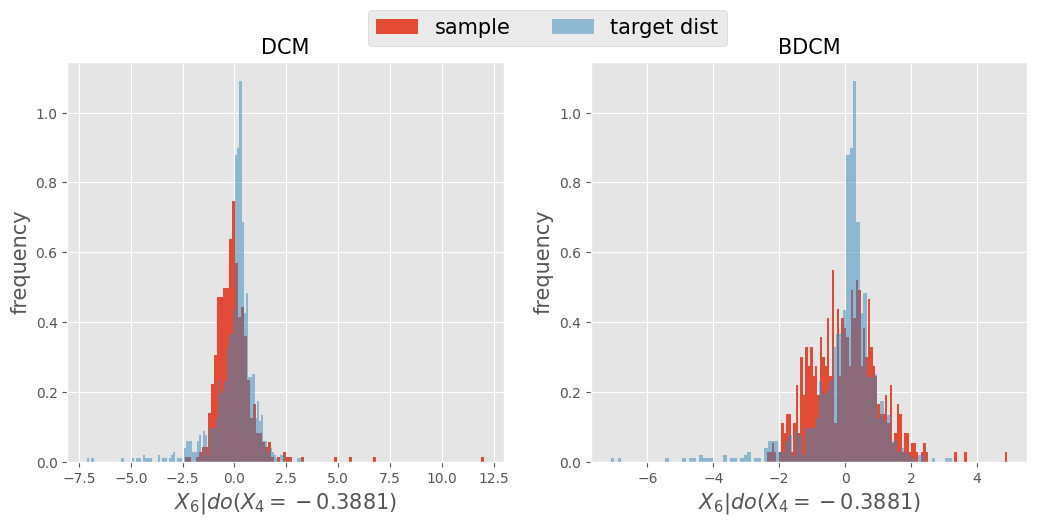

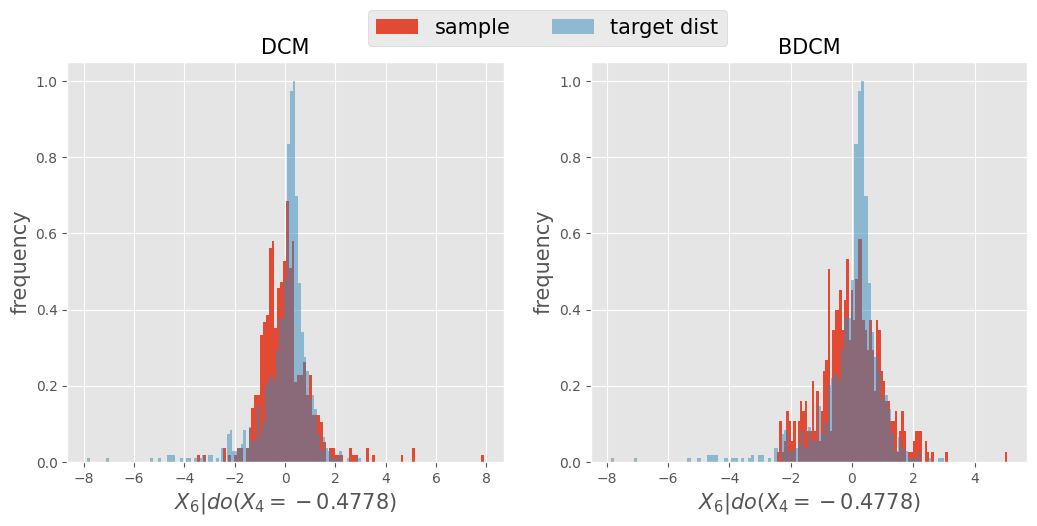

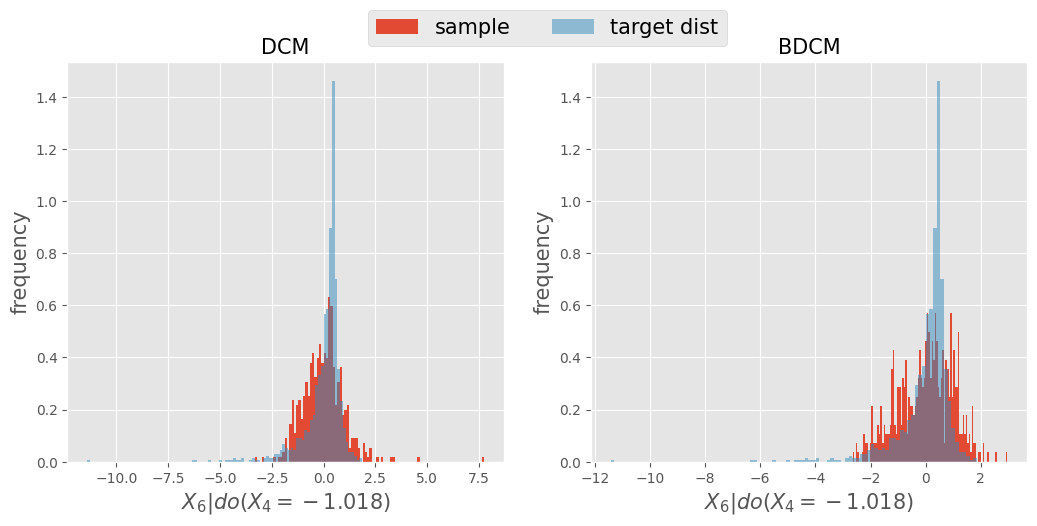

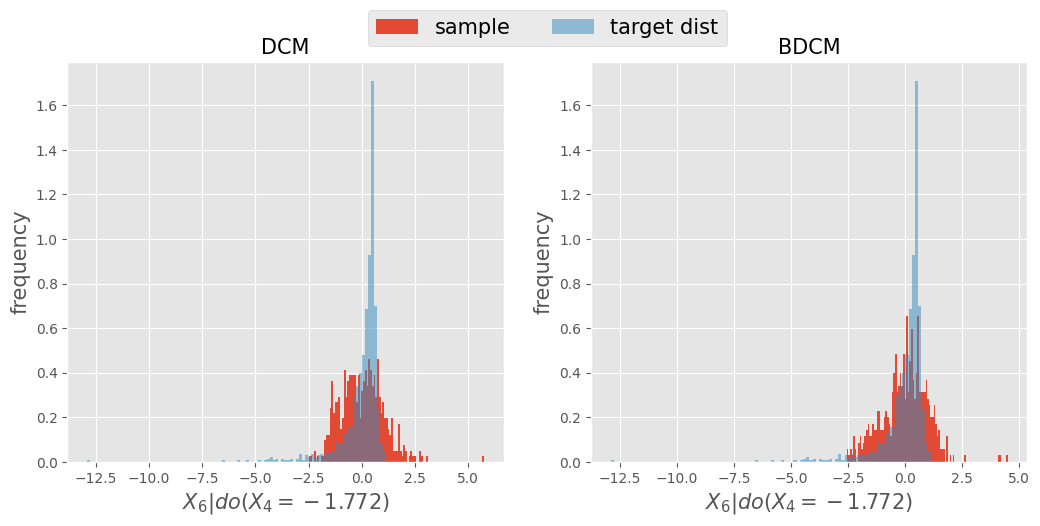

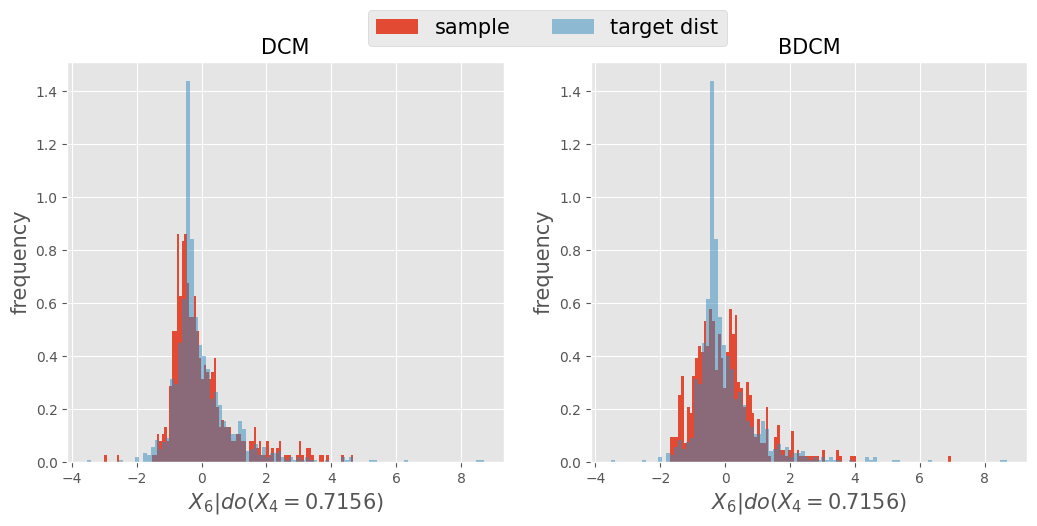

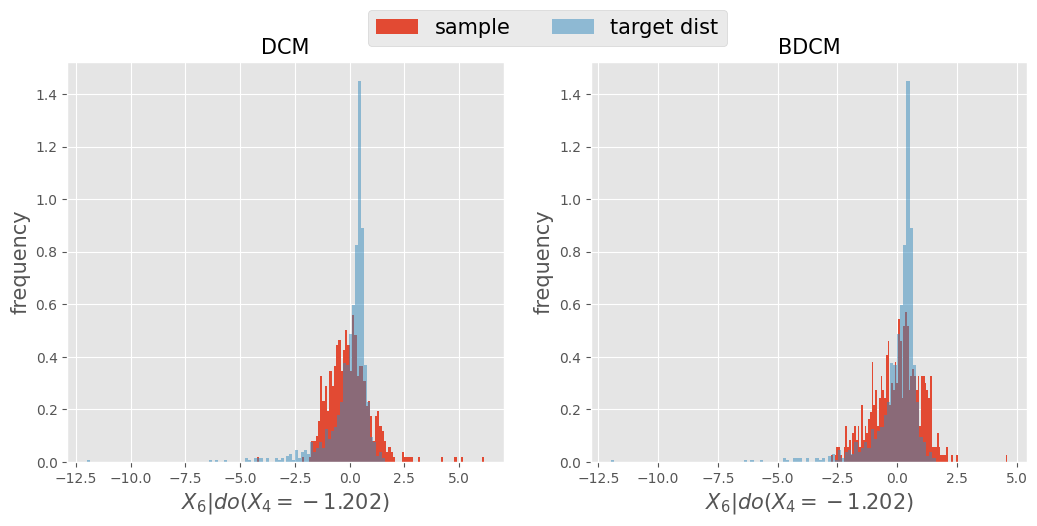

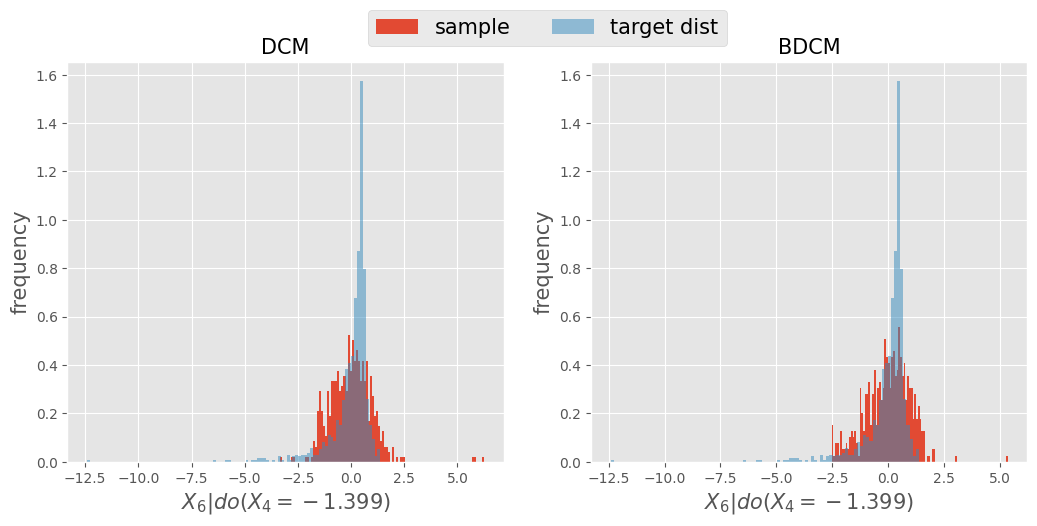

 60%|██████    | 3/5 [28:56<19:12, 576.42s/it]

mean of MMD for DCM: 0.00271
standard deviation of MMD for DCM: 0.0012
mean of MMD for BDCM: 0.0015
standard deviation of MMD for BDCM: 0.000725


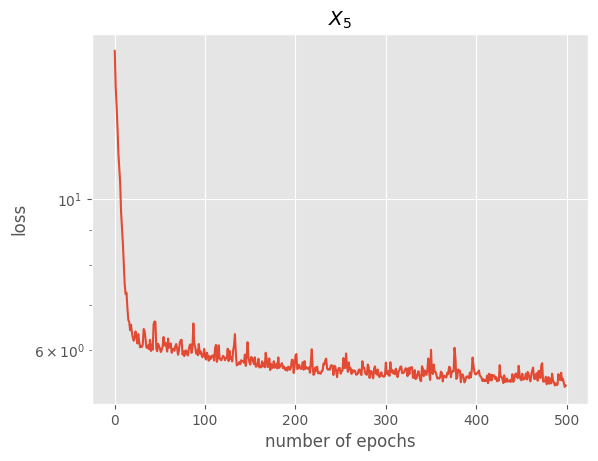

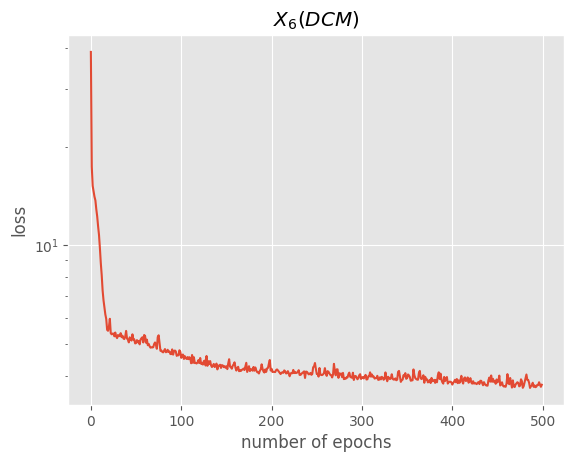

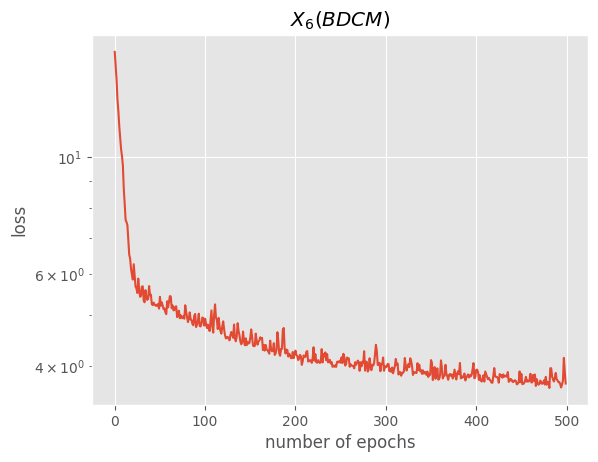

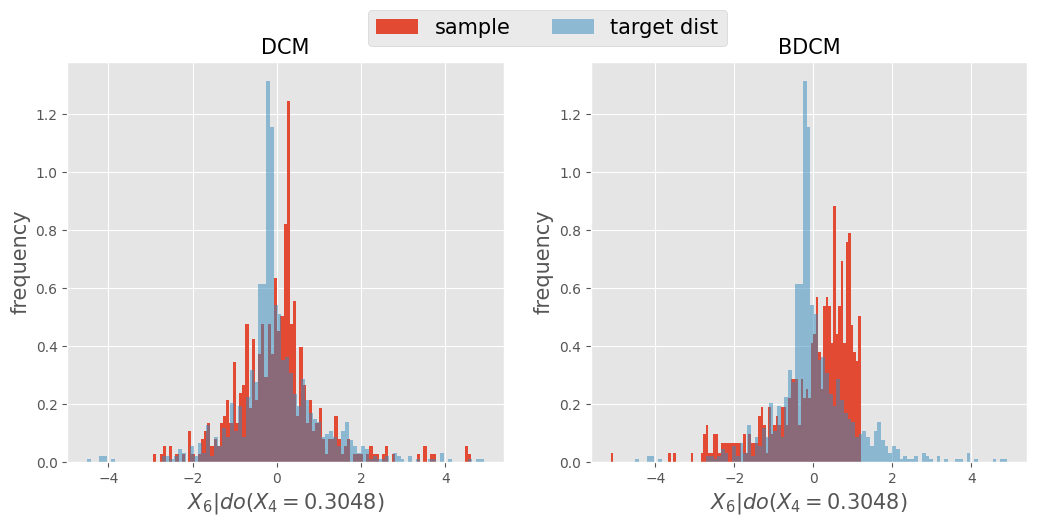

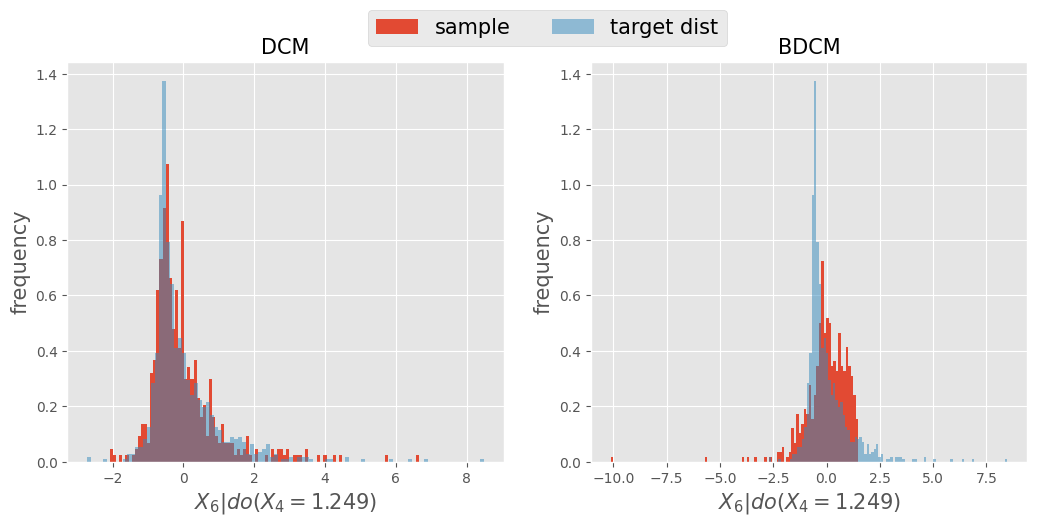

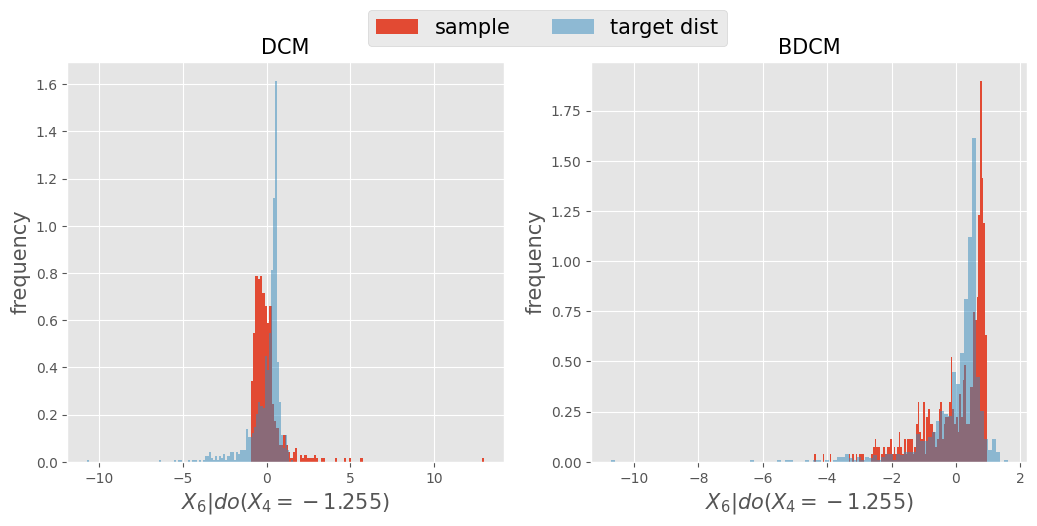

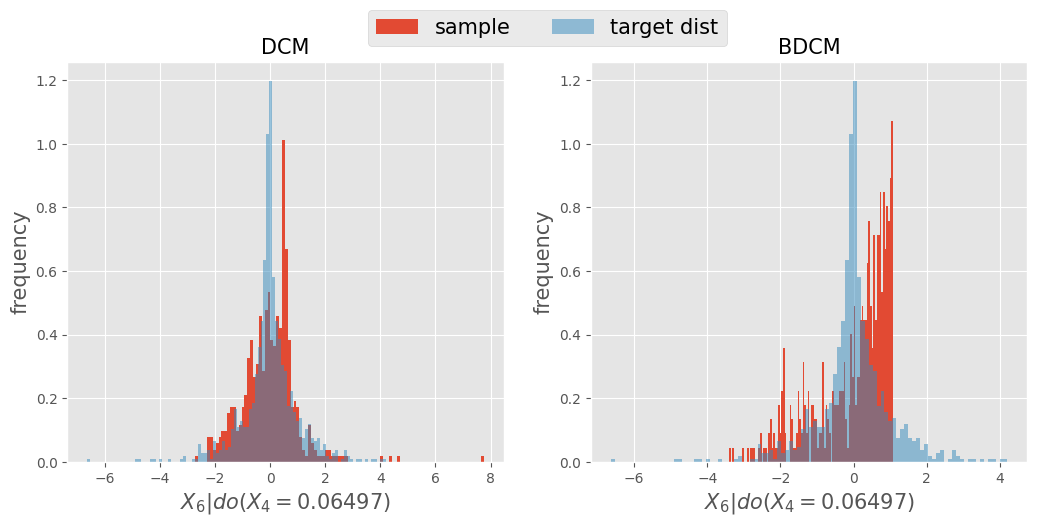

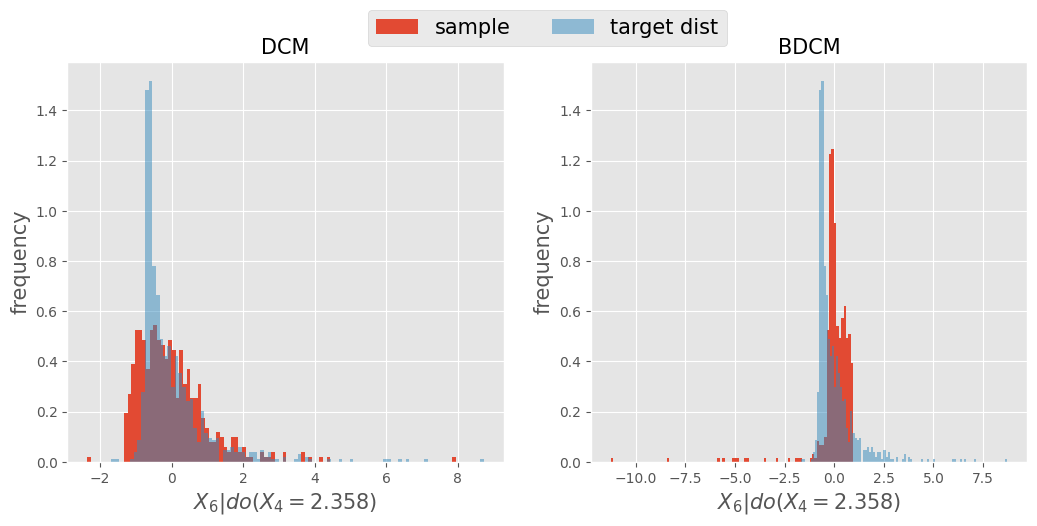

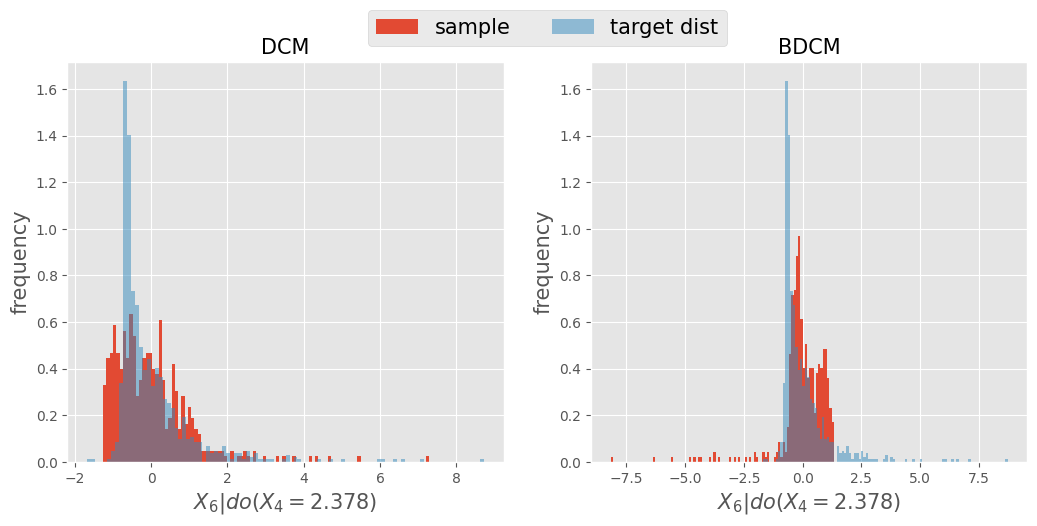

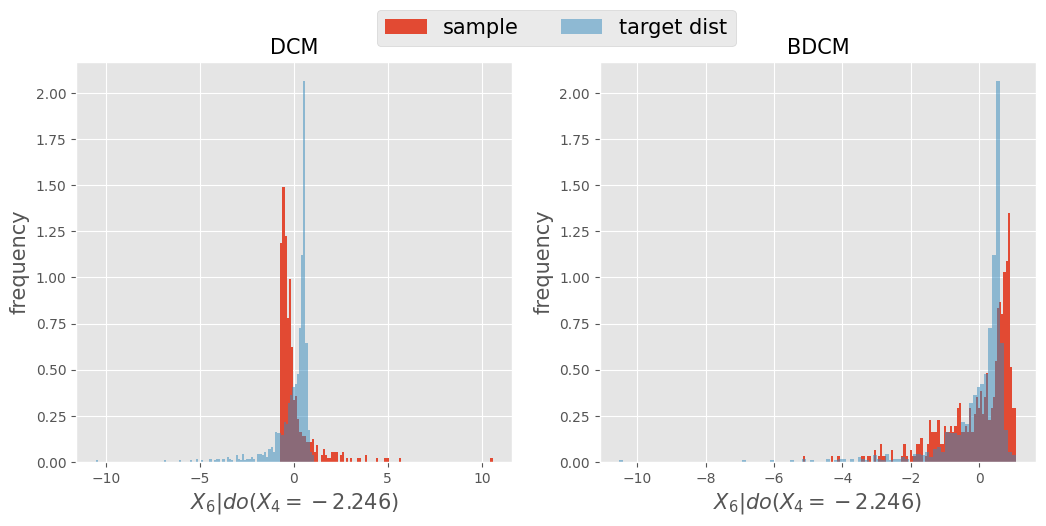

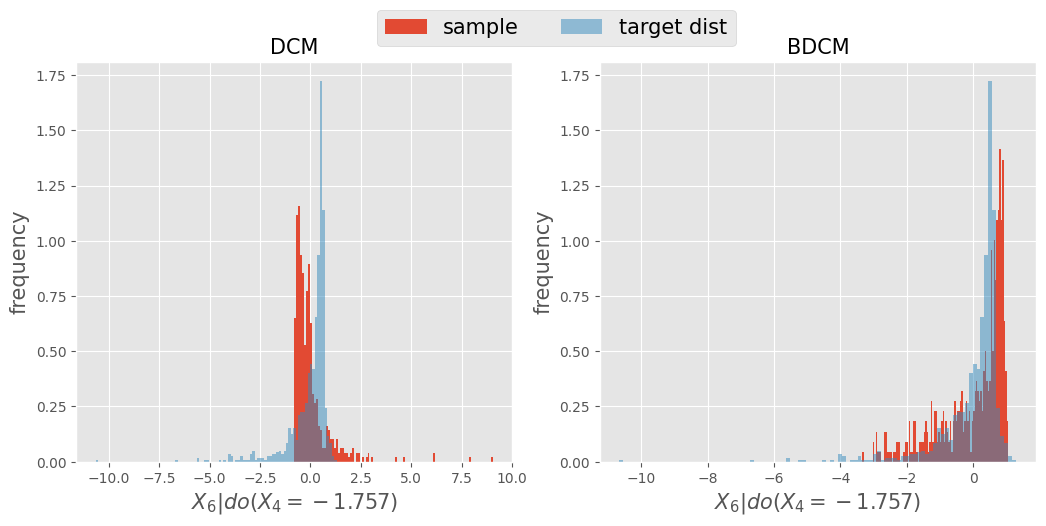

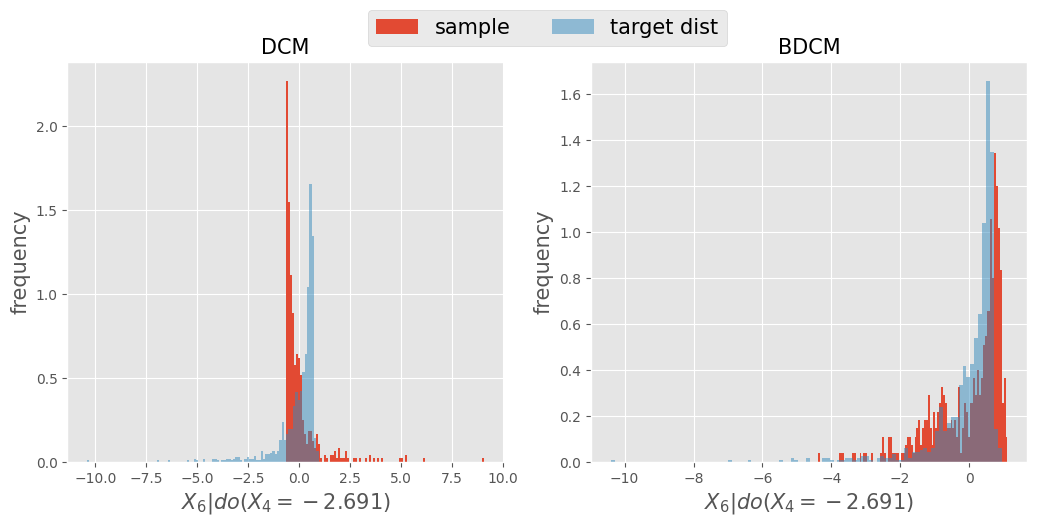

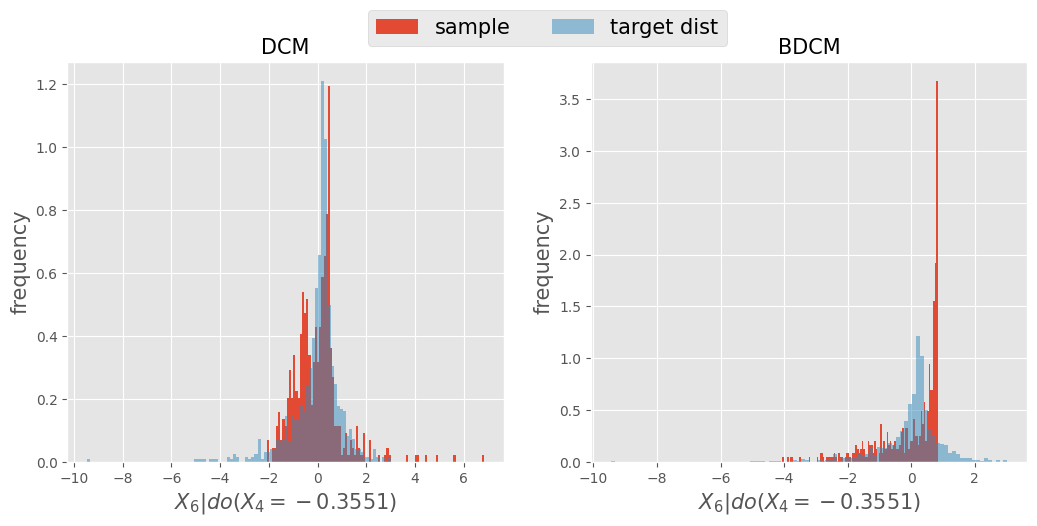

 80%|████████  | 4/5 [38:27<09:34, 574.59s/it]

mean of MMD for DCM: 0.00346
standard deviation of MMD for DCM: 0.00314
mean of MMD for BDCM: 0.00172
standard deviation of MMD for BDCM: 0.00154


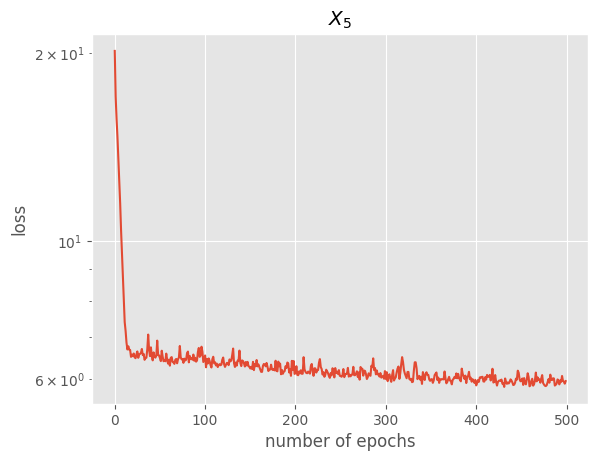

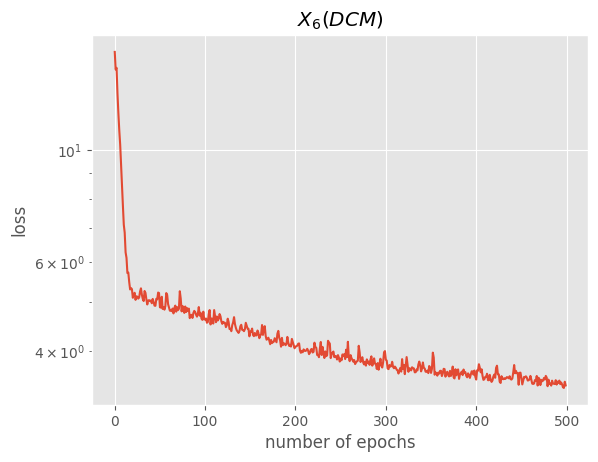

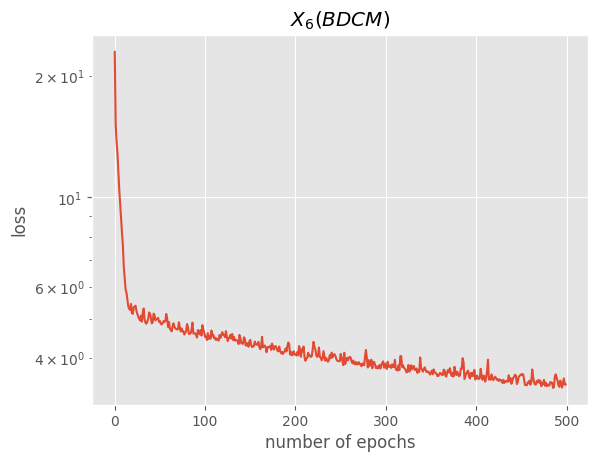

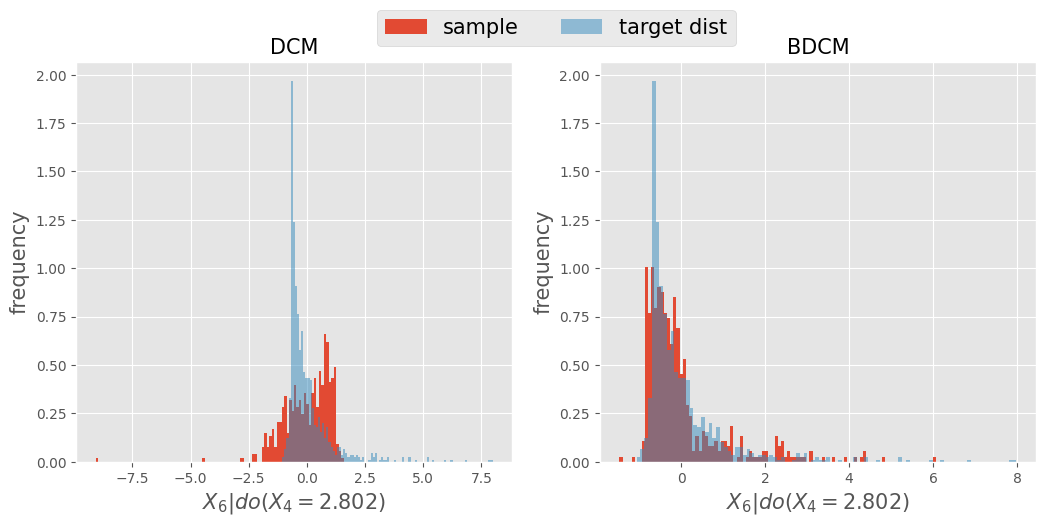

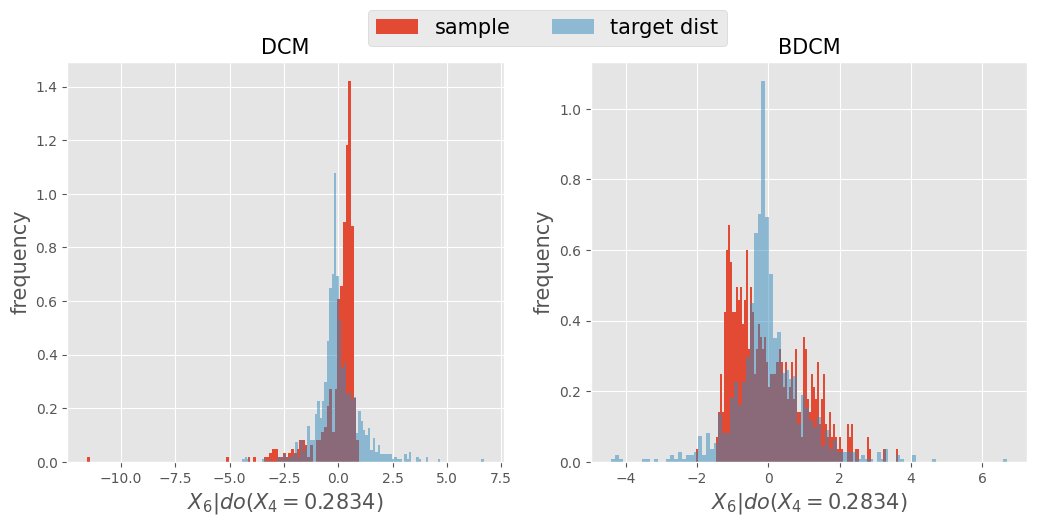

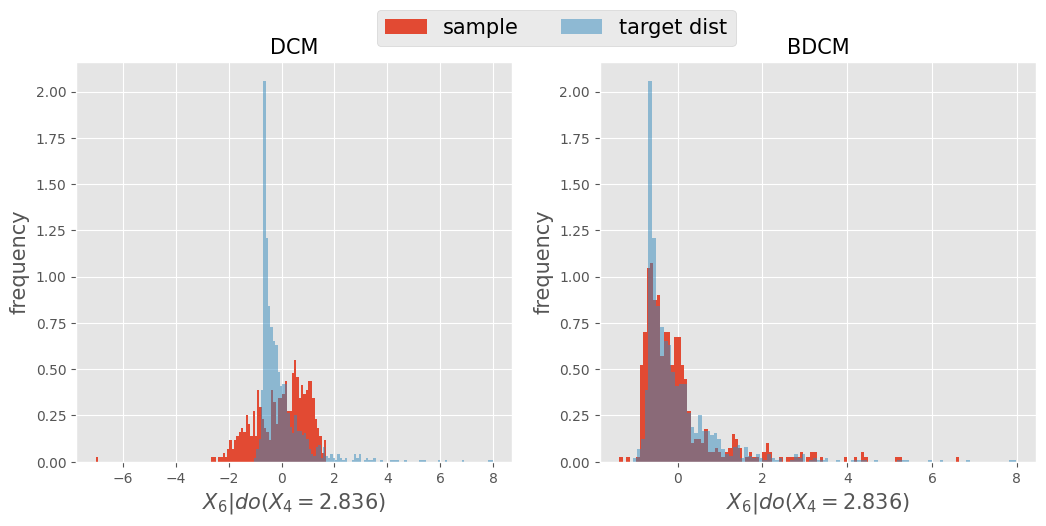

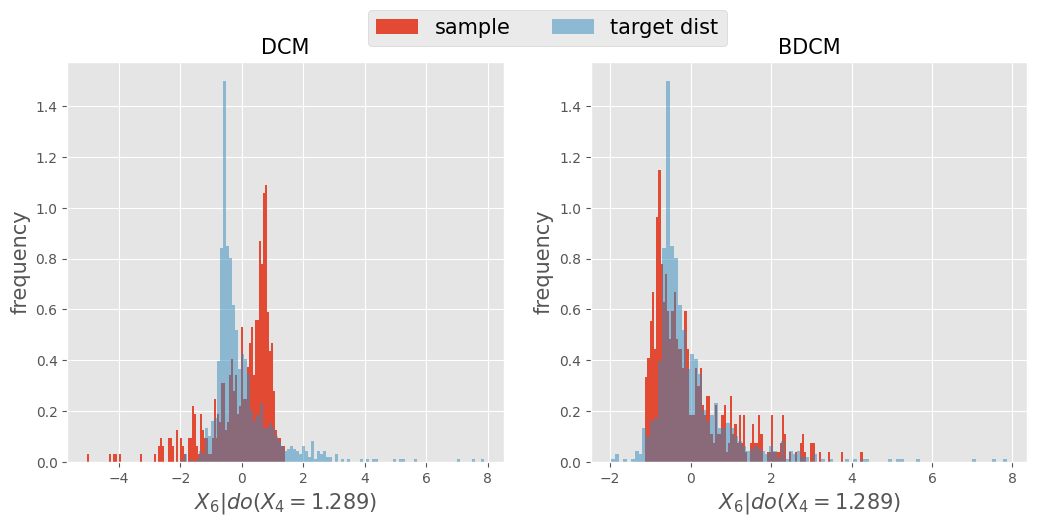

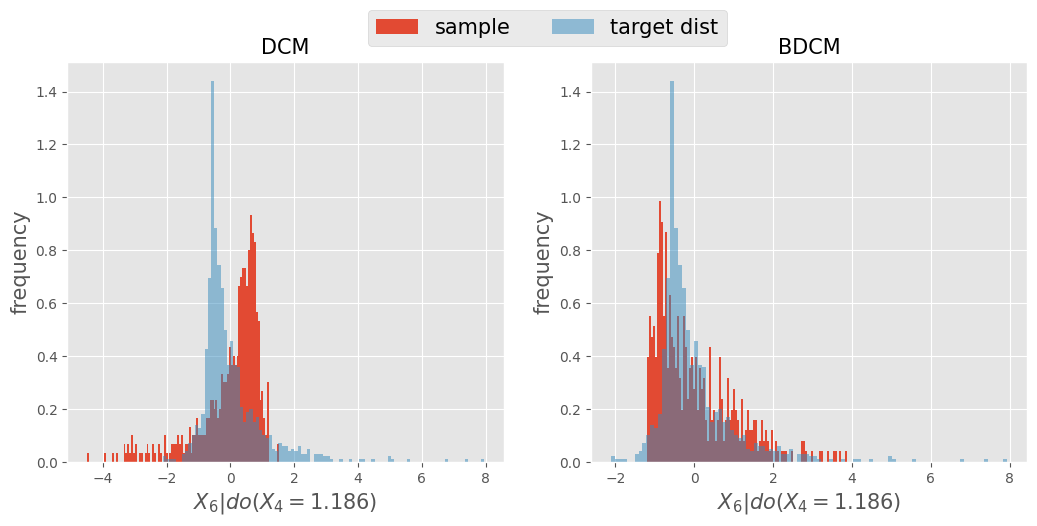

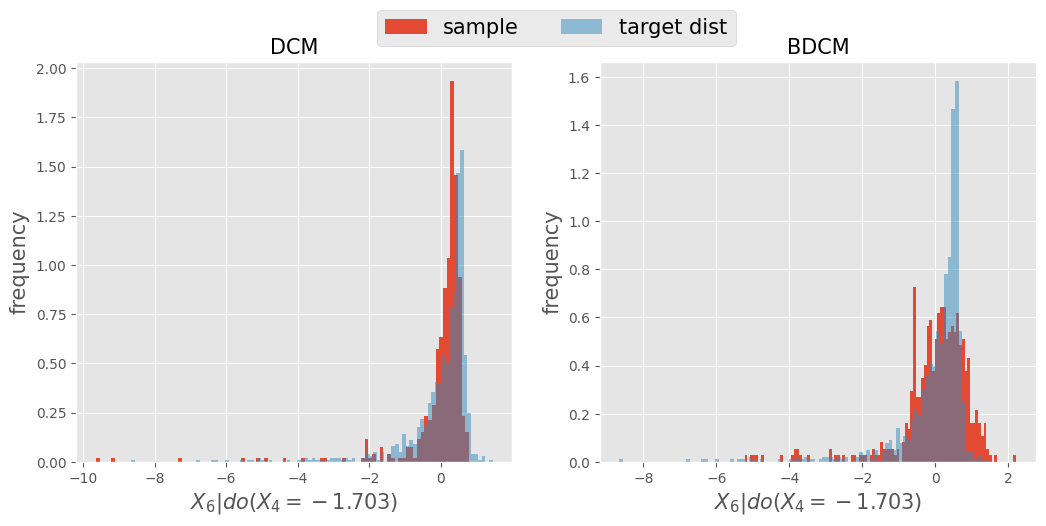

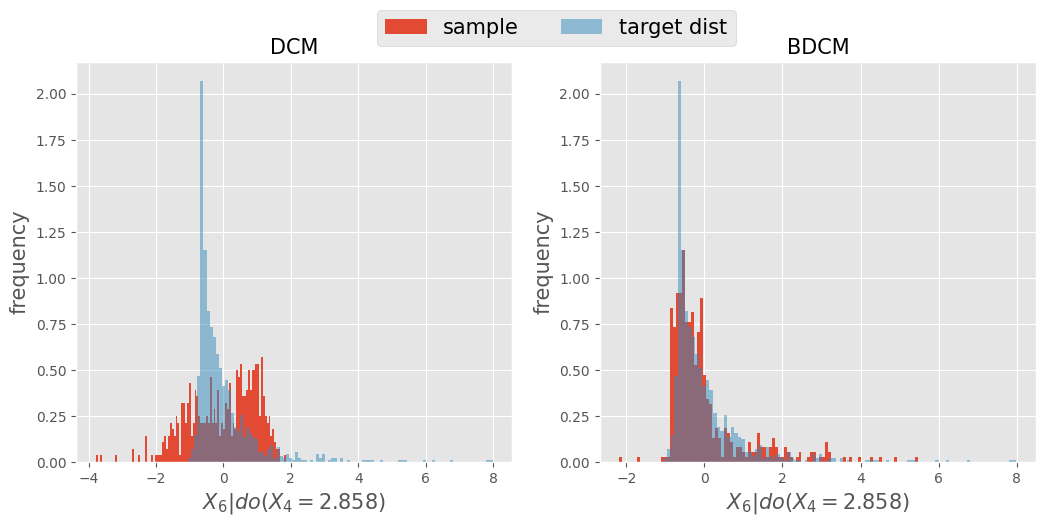

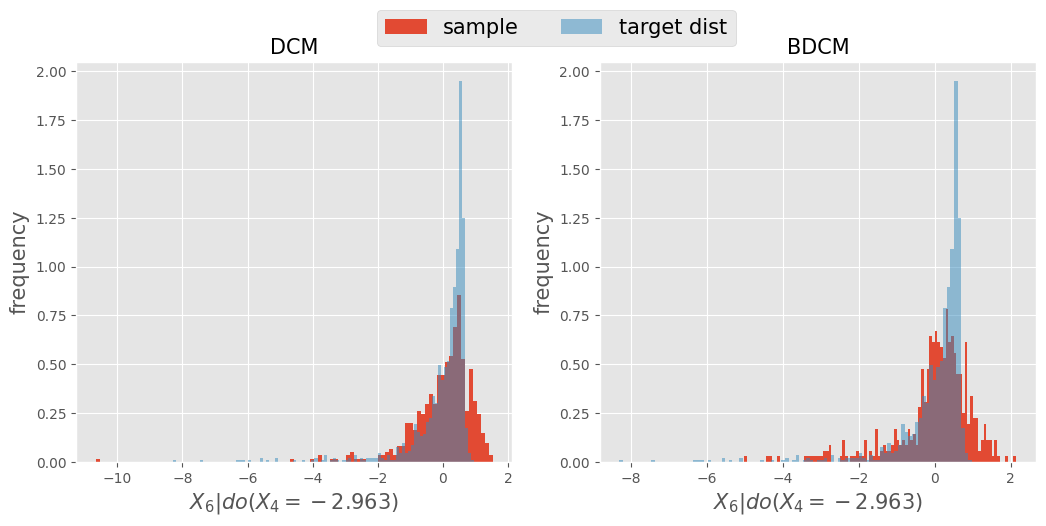

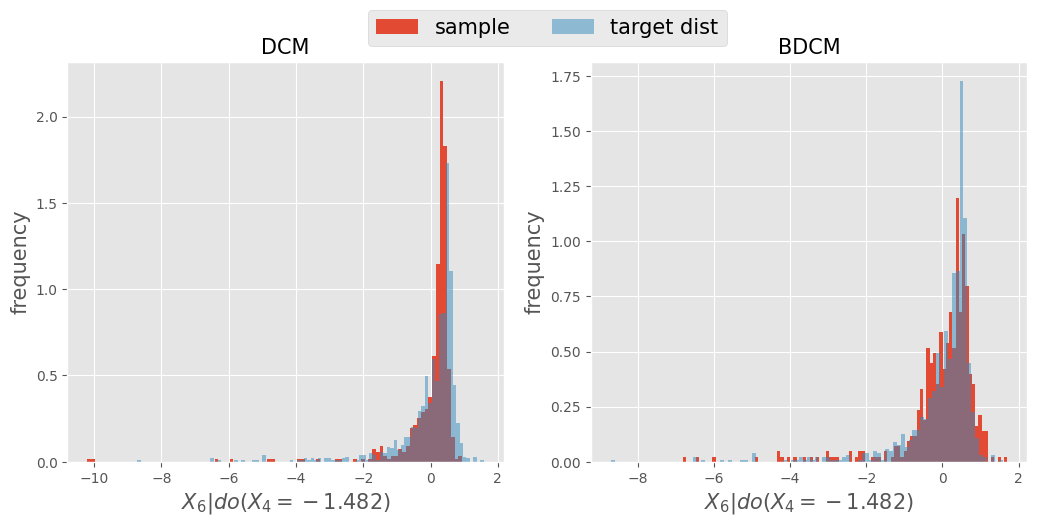

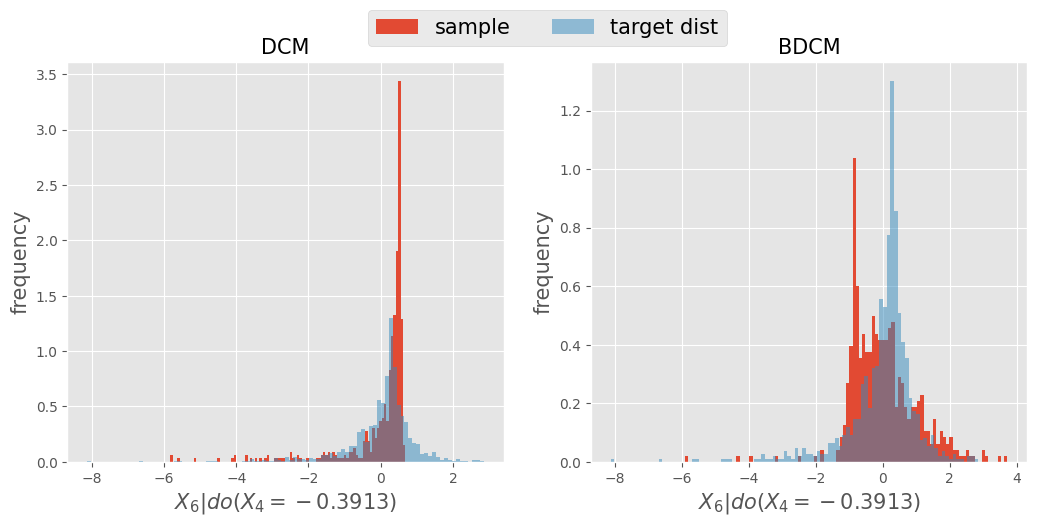

100%|██████████| 5/5 [48:18<00:00, 579.76s/it]

mean of MMD for DCM: 0.00184
standard deviation of MMD for DCM: 0.000799
mean of MMD for BDCM: 0.000343
standard deviation of MMD for BDCM: 0.000259
mean of all MMD for DCM: 0.00289
standard deviation of all MMD for DCM: 0.00208
mean of all MMD for BDCM: 0.00155
standard deviation of all MMD for BDCM: 0.00191


In [2]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = (np.sqrt(abs(x[0]) * (abs(u) + 0.1))) / 2 + abs(x[0]) + u / 5
  elif ind == 2:
    output = 1 / (1 + (abs(u) + 0.1) * np.exp(-x[1]))
  elif ind == 3:
    output = (u * (abs(x[2]) + 0.3)) / 5 + u
  elif ind == 4:
    output = 1 / (np.sqrt(abs(u * x[2])) + 0.1) + u
  elif ind == 5:
    output = x[1] ** 2 * x[3] + x[1] * x[4] + x[4] * x[5] + x[1] * u
  return normalize(output)


SCM2(structural_eq=structural_eq, simple_or_complex = "complex")